# Imports

We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For performing statistical operations
import scipy.stats as stats

# For standardizing features
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For clustering data
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# For checking accuracy score of the models
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. [Pandas has many methods](http://pandas.pydata.org/pandas-docs/stable/) to help make the data science/machine learning pipeline as smooth as possible.

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('heart.csv')
# Display top of dataframe
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 14 columns and we don't know what some of them mean! All we know from the problem statement is that we want to predict the class in the target column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand. In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless, I like to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns.

While we don't need to study every column, it would be a good idea to at least understand the target we want to predict. Here is the definition for the target:
In this database, we have **3 different outputs**:

**Presence of heart disease in the patient: 1**     
     
**Absence of heart disease in the patient: 0**

In [3]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Types and Missing Values

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, we can see that there are no presence of null values.

In [4]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Statistics for each column
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, I did not write this function myself, but rather found it online in a [Stack Overflow forum](https://stackoverflow.com/a/39734251)! 

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Exploratory Data Analysis

[Exploratory Data Analysis (EDA)](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. 

To begin the EDA, we will focus on a single variable, the target, because this is the target for our machine learning models. We can rename the column to `heart disease` for simplicity and then start exploring this value.

## Single Variable Plots

A single variable (called [univariate](https://en.wikipedia.org/wiki/Univariate_(statistics)) plot shows the distribution of a single variable such as in a histogram.

### Target variable 

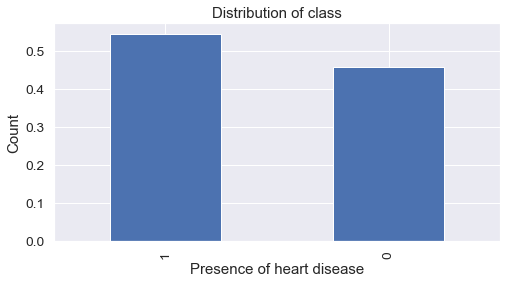

In [8]:
# Rename the target
data = data.rename(columns = {'target': 'heart disease'})

# Bar plot of heart disease

plt.figure(figsize=(8,4))
data['heart disease'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Presence of heart disease")
plt.ylabel("Count")
plt.show()

In [9]:
data['heart disease'].value_counts()

1    165
0    138
Name: heart disease, dtype: int64

**Inferences:**

1. The number of patients showing presence of heart disease is slightly less than the ones not showing the same.
2. The target variable is fairly balanced.

### Age 

Age of the patient

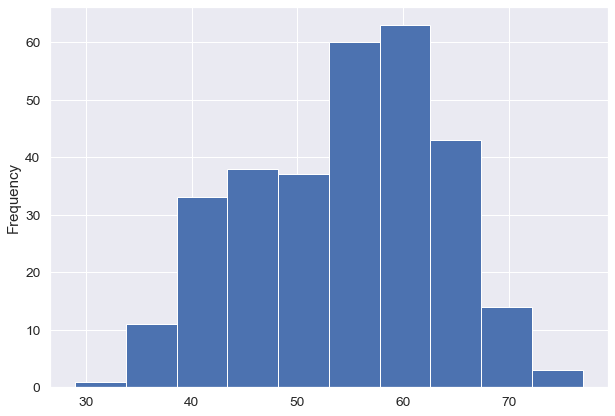

In [10]:
# Histogram for age

plt.figure(figsize=(10,7))
data['age'].plot(kind='hist')
plt.show()

Inferences:

* age follows a **normal distribution** with a slight **skewness towards left (-0.20)** having a **mean of 54.37** and **standard deviation of 9.08**.
* Most of the patients fall in the age range of **55 to 60**.

### Sex

Sex/Gender of the patient (1 = male, 0 = female)

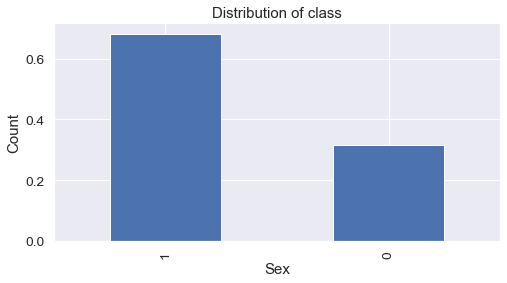

In [11]:
# Bar plot for sex

plt.figure(figsize=(8,4))
data['sex'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of males are **approximately twice** the number of females

### cp

Chest pain type: https://www.medicinenet.com/causes_of_chest_pain_signs_and_symptoms/article.htm

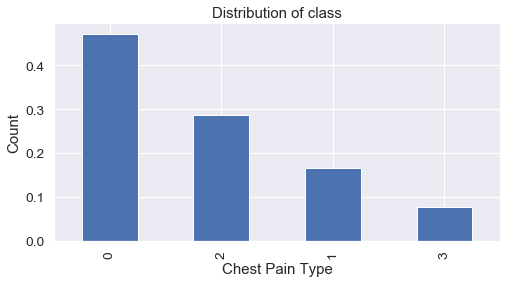

In [12]:
# Bar plot for sex

plt.figure(figsize=(8,4))
data['cp'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of patients under chest pain type '0' are **maximum** while type '3' has the **minimum**.

### trestbps 

Resting blood pressure (in mm Hg on admission to the hospital): https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

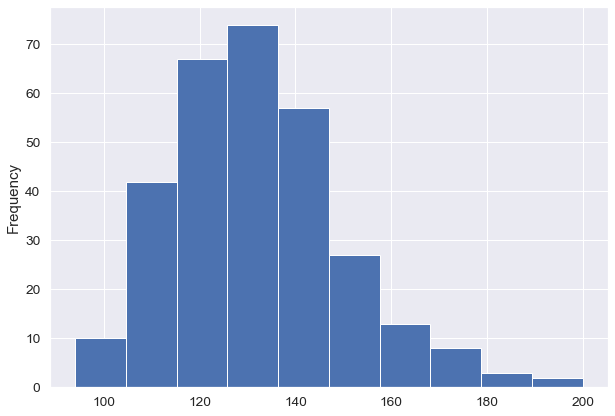

In [13]:
# Histogram for trestbps

plt.figure(figsize=(10,7))
data['trestbps'].plot(kind='hist')
plt.show()

Inferences:

* trestbps follows a normal distribution with a slight skewness towards right (**0.71**) having a **mean of 131.62** and **standard deviation of 17.54**.
* Most of the patients are having a resting blood pressure of **120 to 140**.

### chol

Serum cholesterol in mg/dl: https://www.medicalnewstoday.com/articles/321519.php

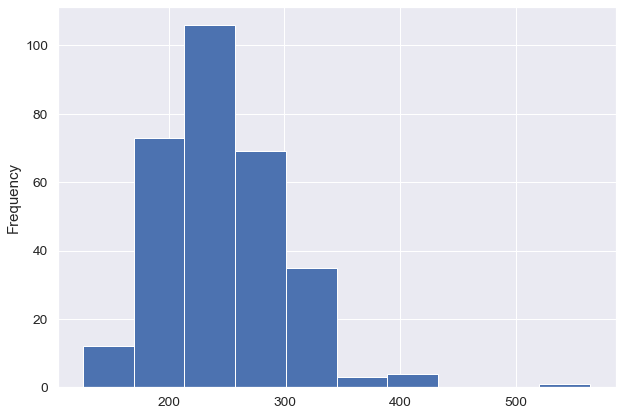

In [14]:
# Histogram for chol

plt.figure(figsize=(10,7))
data['chol'].plot(kind='hist')
plt.show()

Inferences:

* chol follows a **normal distribution** with a **mean of 246.26** and **standard deviation of 51.83**.
* Most of the patients are having a serum cholesterol of **200 to 300**.
* There are signs of **outlier presence beyond 500**.

### fbs 

Fasting blood sugar > 120 mg/dl (1 = true, 0 = false): https://www.medicalnewstoday.com/articles/317466.php

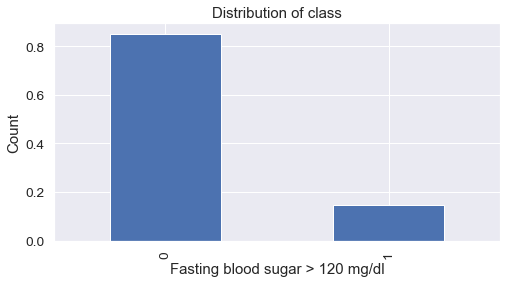

In [15]:
# Bar plot for fbs

plt.figure(figsize=(8,4))
data['fbs'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Fasting blood sugar > 120 mg/dl")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of patients having a test result of >120 mg/dl is **significantly less**.

### restecg 

Resting electrocardiographic results: https://www.ncbi.nlm.nih.gov/pubmed/2729316

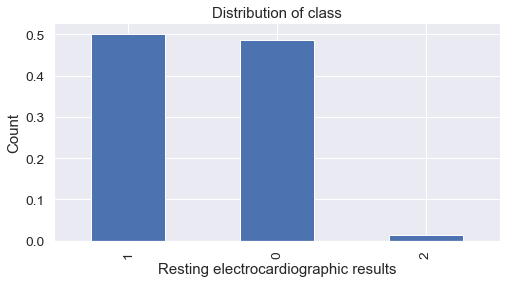

In [16]:
# Bar plot for restecg

plt.figure(figsize=(8,4))
data['restecg'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Resting electrocardiographic results")
plt.ylabel("Count")
plt.show()

Inferences:

* The restecg results of 1 and 0 are **significantly** more than 2.

### thalach 

Maximum heart rate achieved

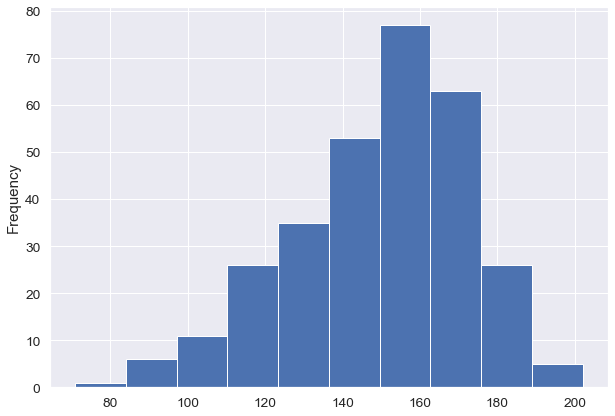

In [17]:
# Histogram for thalach

plt.figure(figsize=(10,7))
data['thalach'].plot(kind='hist')
plt.show()

Inferences:

* thalach follows a normal distribution with a slight skewness towards left (**-0.54**) having a **mean of 149.65** and **standard deviation of 22.91**.
* Most of the patients are having a achieved maximum heart rate of **140 to 170**.

### exang 

exercise induced angina (1 = yes; 0 = no): https://www.ncbi.nlm.nih.gov/pubmed/4068968

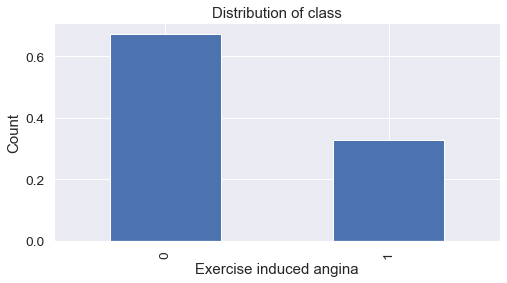

In [18]:
# Bar plot for exang

plt.figure(figsize=(8,4))
data['exang'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Exercise induced angina")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of patients undergoing exercise induced angina are **significantly less** than vice-versa.

### oldpeak 

ST depression induced by exercise relative to rest: https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.80.1.87

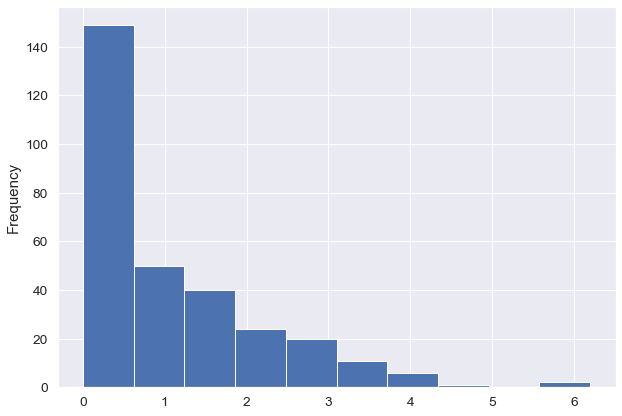

In [19]:
# Histogram for oldpeak

plt.figure(figsize=(10,7))
data['oldpeak'].plot(kind='hist')
plt.show()

Inferences:

* Most of the patients are having an oldpeak value of **0**.

### slope 

the slope of the peak exercise ST segment: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1629217/

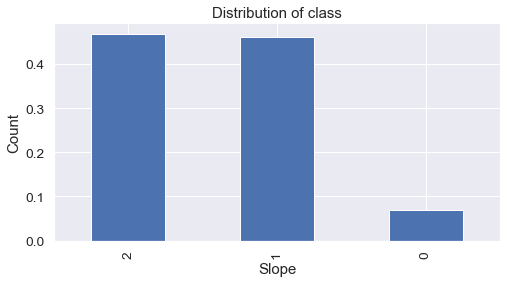

In [20]:
# Bar plot for slope

plt.figure(figsize=(8,4))
data['slope'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Slope")
plt.ylabel("Count")
plt.show()

Inferences:

* The slopes of 2 and 1 are **significantly more** than 0.

### ca 

Number of major vessels (0-4) colored by flourosopy: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/

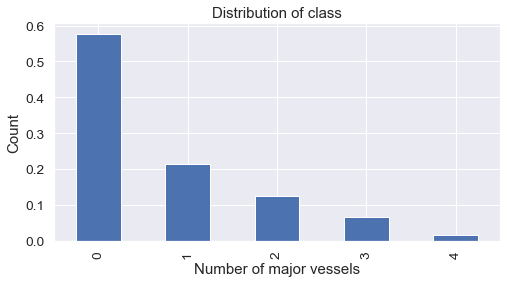

In [21]:
# Bar plot for ca

plt.figure(figsize=(8,4))
data['ca'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.xlabel("Number of major vessels")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of patients having '0' number of major vessels is **maximum** while the ones having '4' are **minimum**.

### thal 

https://www.ncbi.nlm.nih.gov/pubmed/17488690

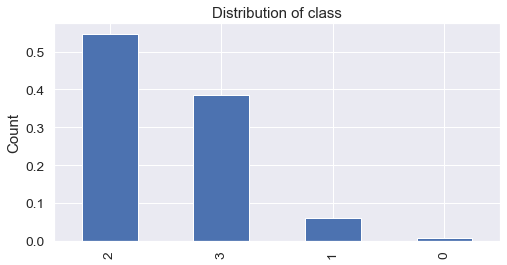

In [22]:
# Bar plot for ca

plt.figure(figsize=(8,4))
data['thal'].value_counts(normalize=True).plot(kind='bar').set_title("Distribution of class")
plt.ylabel("Count")
plt.show()

Inferences:

* The number of patients having a thal value of '2' is **maximum** while the ones having '0' are **minimum**.

## Bivariate analysis

### age vs heart disease

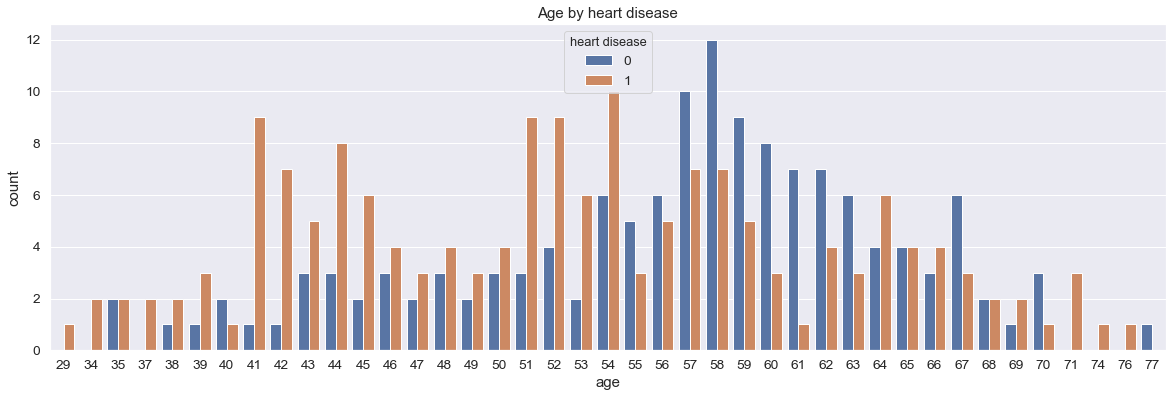

In [23]:
# Count plot of age by heart disease

plt.figure(figsize=(20,6))
sns.countplot(data['age'],hue = data['heart disease']).set_title('Age by heart disease')
plt.show()

Inferences:

* The ages of **41**, **44**, **51**, **52** and **54** has the **maximum** number of patients showing presence of a heart disease.

### sex vs heart disease

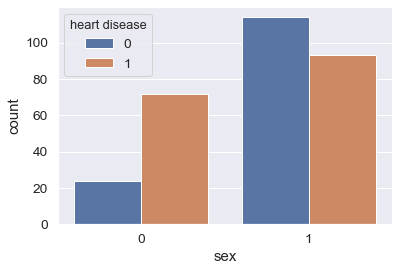

In [24]:
# Count plot of sex by heart disease

sns.countplot(data['sex'],hue = data['heart disease'])
plt.show()

Inferences:

* Approximately **45% of males** suffer from a heart disease whereas **75% of females** suffer from the same.

* Males are **greater in number** when it comes to showing **both presence and absence** of a heart disease.

### cp vs heart disease

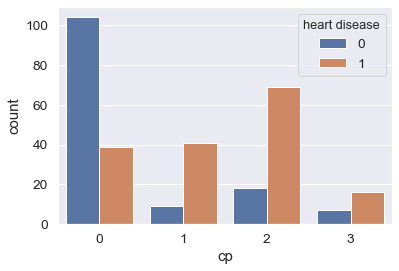

In [25]:
# Count plot of cp by heart disease

sns.countplot(data['cp'],hue = data['heart disease'])
plt.show()

Inferences:

* Chest pains of **type 1 and 2** has the **maximum** patients showing **presence** of a heart disease.
* Chest pain of **type 0** has the **maximum** patients showing **absence** of a heart disease.

### trestbps vs heart disease

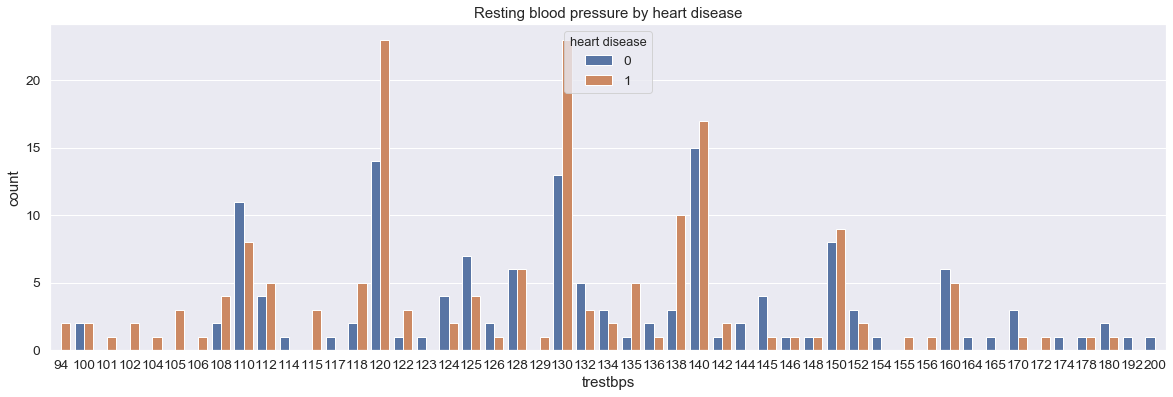

In [26]:
# Count plot of trestbps by heart disease

plt.figure(figsize=(20,6))
sns.countplot(data['trestbps'],hue = data['heart disease']).set_title('Resting blood pressure by heart disease')
plt.show()

Inferences:

* Patients having resting blood pressures of **120**, **130** and **140** are **maximum** in number showing presence of a heart disease.

### chol vs heart disease

We will categorise serum cholesterol into 'Normal' and 'Not normal' based on the stated ranges

In [27]:
def chol_cat(chol):
    if chol>=125 and chol<=200:
        return 'Normal'
    else:
        return 'Not normal'

data['chol_cat'] = data['chol'].apply(chol_cat)

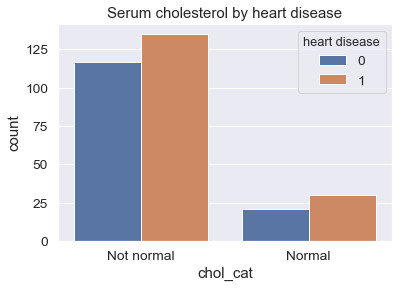

In [28]:
# Count plot of chol by heart disease

sns.countplot(data['chol_cat'],hue = data['heart disease']).set_title('Serum cholesterol by heart disease')
plt.show()
data.drop('chol_cat',axis=1,inplace=True)

Inferences:

* Patients having a serum cholesterol value in the 'Not normal' range are more in number **both in terms of presence and absence of a heart disease** than the ones having a value in the normal range.

### fbs vs heart disease

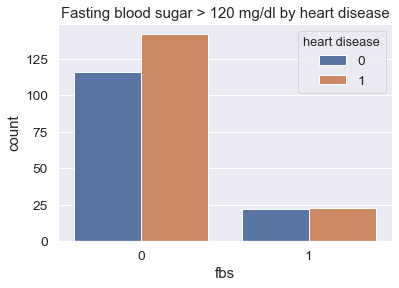

In [29]:
# Count plot of fbs by heart disease

sns.countplot(data['fbs'],hue = data['heart disease']).set_title('Fasting blood sugar > 120 mg/dl by heart disease')
plt.show()

Inferences:

* Patients not showing a fasting blood sugar level greater than 120 mg/dl are **more in number** in terms of **having as well as not having** a heart disease.

### restecg vs heart disease

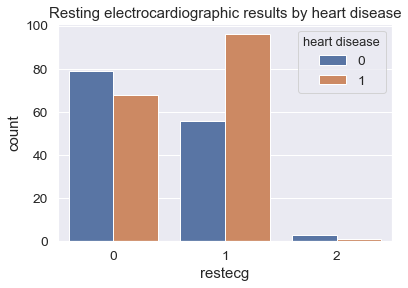

In [30]:
# Count plot of restecg by heart disease

sns.countplot(data['restecg'],hue = data['heart disease']).set_title('Resting electrocardiographic results by heart disease')
plt.show()

Inferences:

* Patients falling in category 1 of resting electrocardiographic results are **maximum** in terms of having a heart disease while patients in category 2 are **least** in number for the same.

* Patients falling in category 0 of resting electrocardiographic results are **maximum** in terms of not having a heart disease.

### thalach vs heart disease

We will categorise thalach into 'Low', 'Medium' and 'High' based on percentiles

In [31]:
q1 = np.quantile(data['thalach'],0.25)
q3 = np.quantile(data['thalach'],0.75)
def thalach_cat(thalach):
    if thalach<=q1:
        return 'Low'
    elif thalach>q1 and thalach<=q3:
        return 'Medium'
    else:
        return 'High'

data['thalach_cat'] = data['thalach'].apply(thalach_cat)

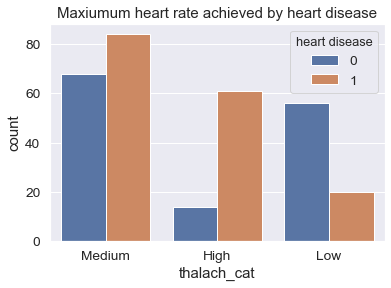

In [32]:
# Count plot of thalach by heart disease

sns.countplot(data['thalach_cat'],hue = data['heart disease']).set_title('Maxiumum heart rate achieved by heart disease')
plt.show()
data.drop('thalach_cat',axis=1,inplace=True)

Inferences:

* Patients having a maximum heart rate value in the 'Medium' range are **more** in number in terms of presence of a heart disease while 'Low' range has the **least** in number.
* The number of patients having a maximum heart rate value in the 'High' are very **low** in terms of absence of a heart disease and high in case of vice-versa.  

### exang vs heart disease

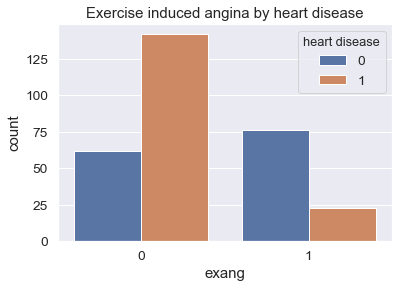

In [33]:
# Count plot of exang by heart disease

sns.countplot(data['exang'],hue = data['heart disease']).set_title('Exercise induced angina by heart disease')
plt.show()

Inferences:

* Patients not performing exercise induced angina are **more** in number in terms of **having** a heart disease.
* Patients performing exercise induced angina are **more** in number in terms of **not having** a heart disease.

### oldpeak vs heart disease

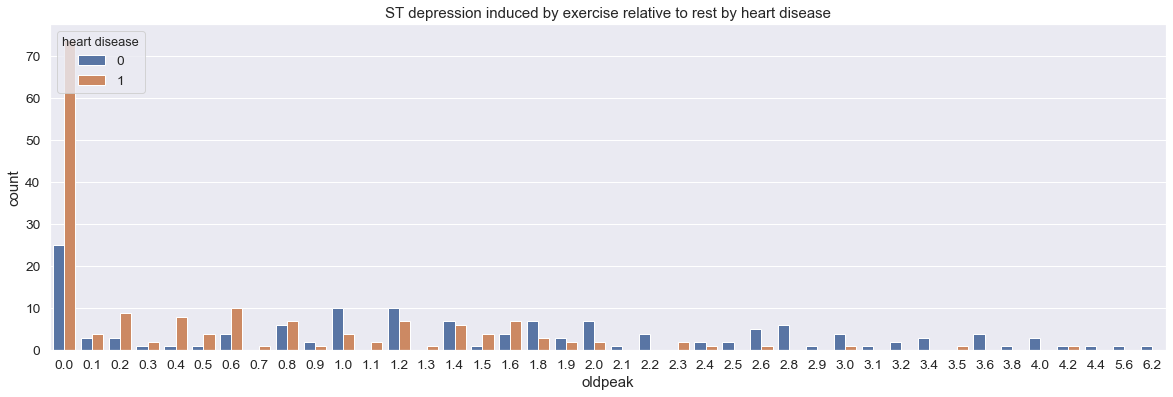

In [34]:
# Count plot of oldpeak by heart disease

plt.figure(figsize=(20,6))
sns.countplot(data['oldpeak'],hue = data['heart disease']).set_title('ST depression induced by exercise relative to rest by heart disease')
plt.show()

Inferences:

* The value of 0.0 shows the **most** number of patients showing a presence of a heart disease.

### slope vs heart disease

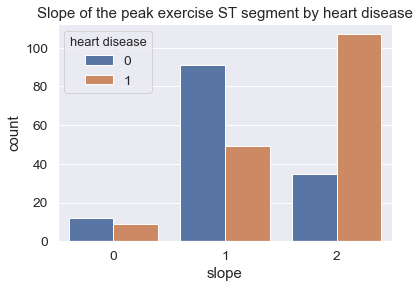

In [35]:
# Count plot of slope by heart disease

sns.countplot(data['slope'],hue = data['heart disease']).set_title('Slope of the peak exercise ST segment by heart disease')
plt.show()

Inferences:

* The slope category '2' has the **most** number of patients **suffering** from a heart disease.
* The slope category '1' has the **most** number of patients **not suffering** from a heart disease.

### ca vs heart disease

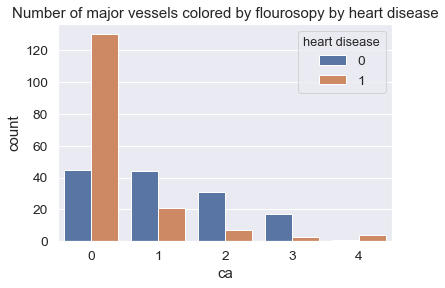

In [36]:
# Count plot of ca by heart disease

sns.countplot(data['ca'],hue = data['heart disease']).set_title('Number of major vessels colored by flourosopy by heart disease')
plt.show()

Inferences:

* Patients having **0 major vessels** colored by flourosopy are **maximum** in number in terms of **having a heart disease**.
* Patients having **4 major vessels** colored by flourosopy are almost zero in number in terms of **not having a heart disease**.

### thal vs heart disease

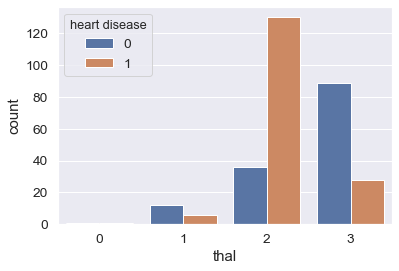

In [37]:
# Count plot of thal by heart disease

sns.countplot(data['thal'],hue = data['heart disease'])
plt.show()

Inferences:

* **Category 2** has the **maximum** number of patients **suffering** from a heart disease.
* **Category 3** has the **maximum** number of patients **not suffering** from a heart disease.

### Pair plot of dataset

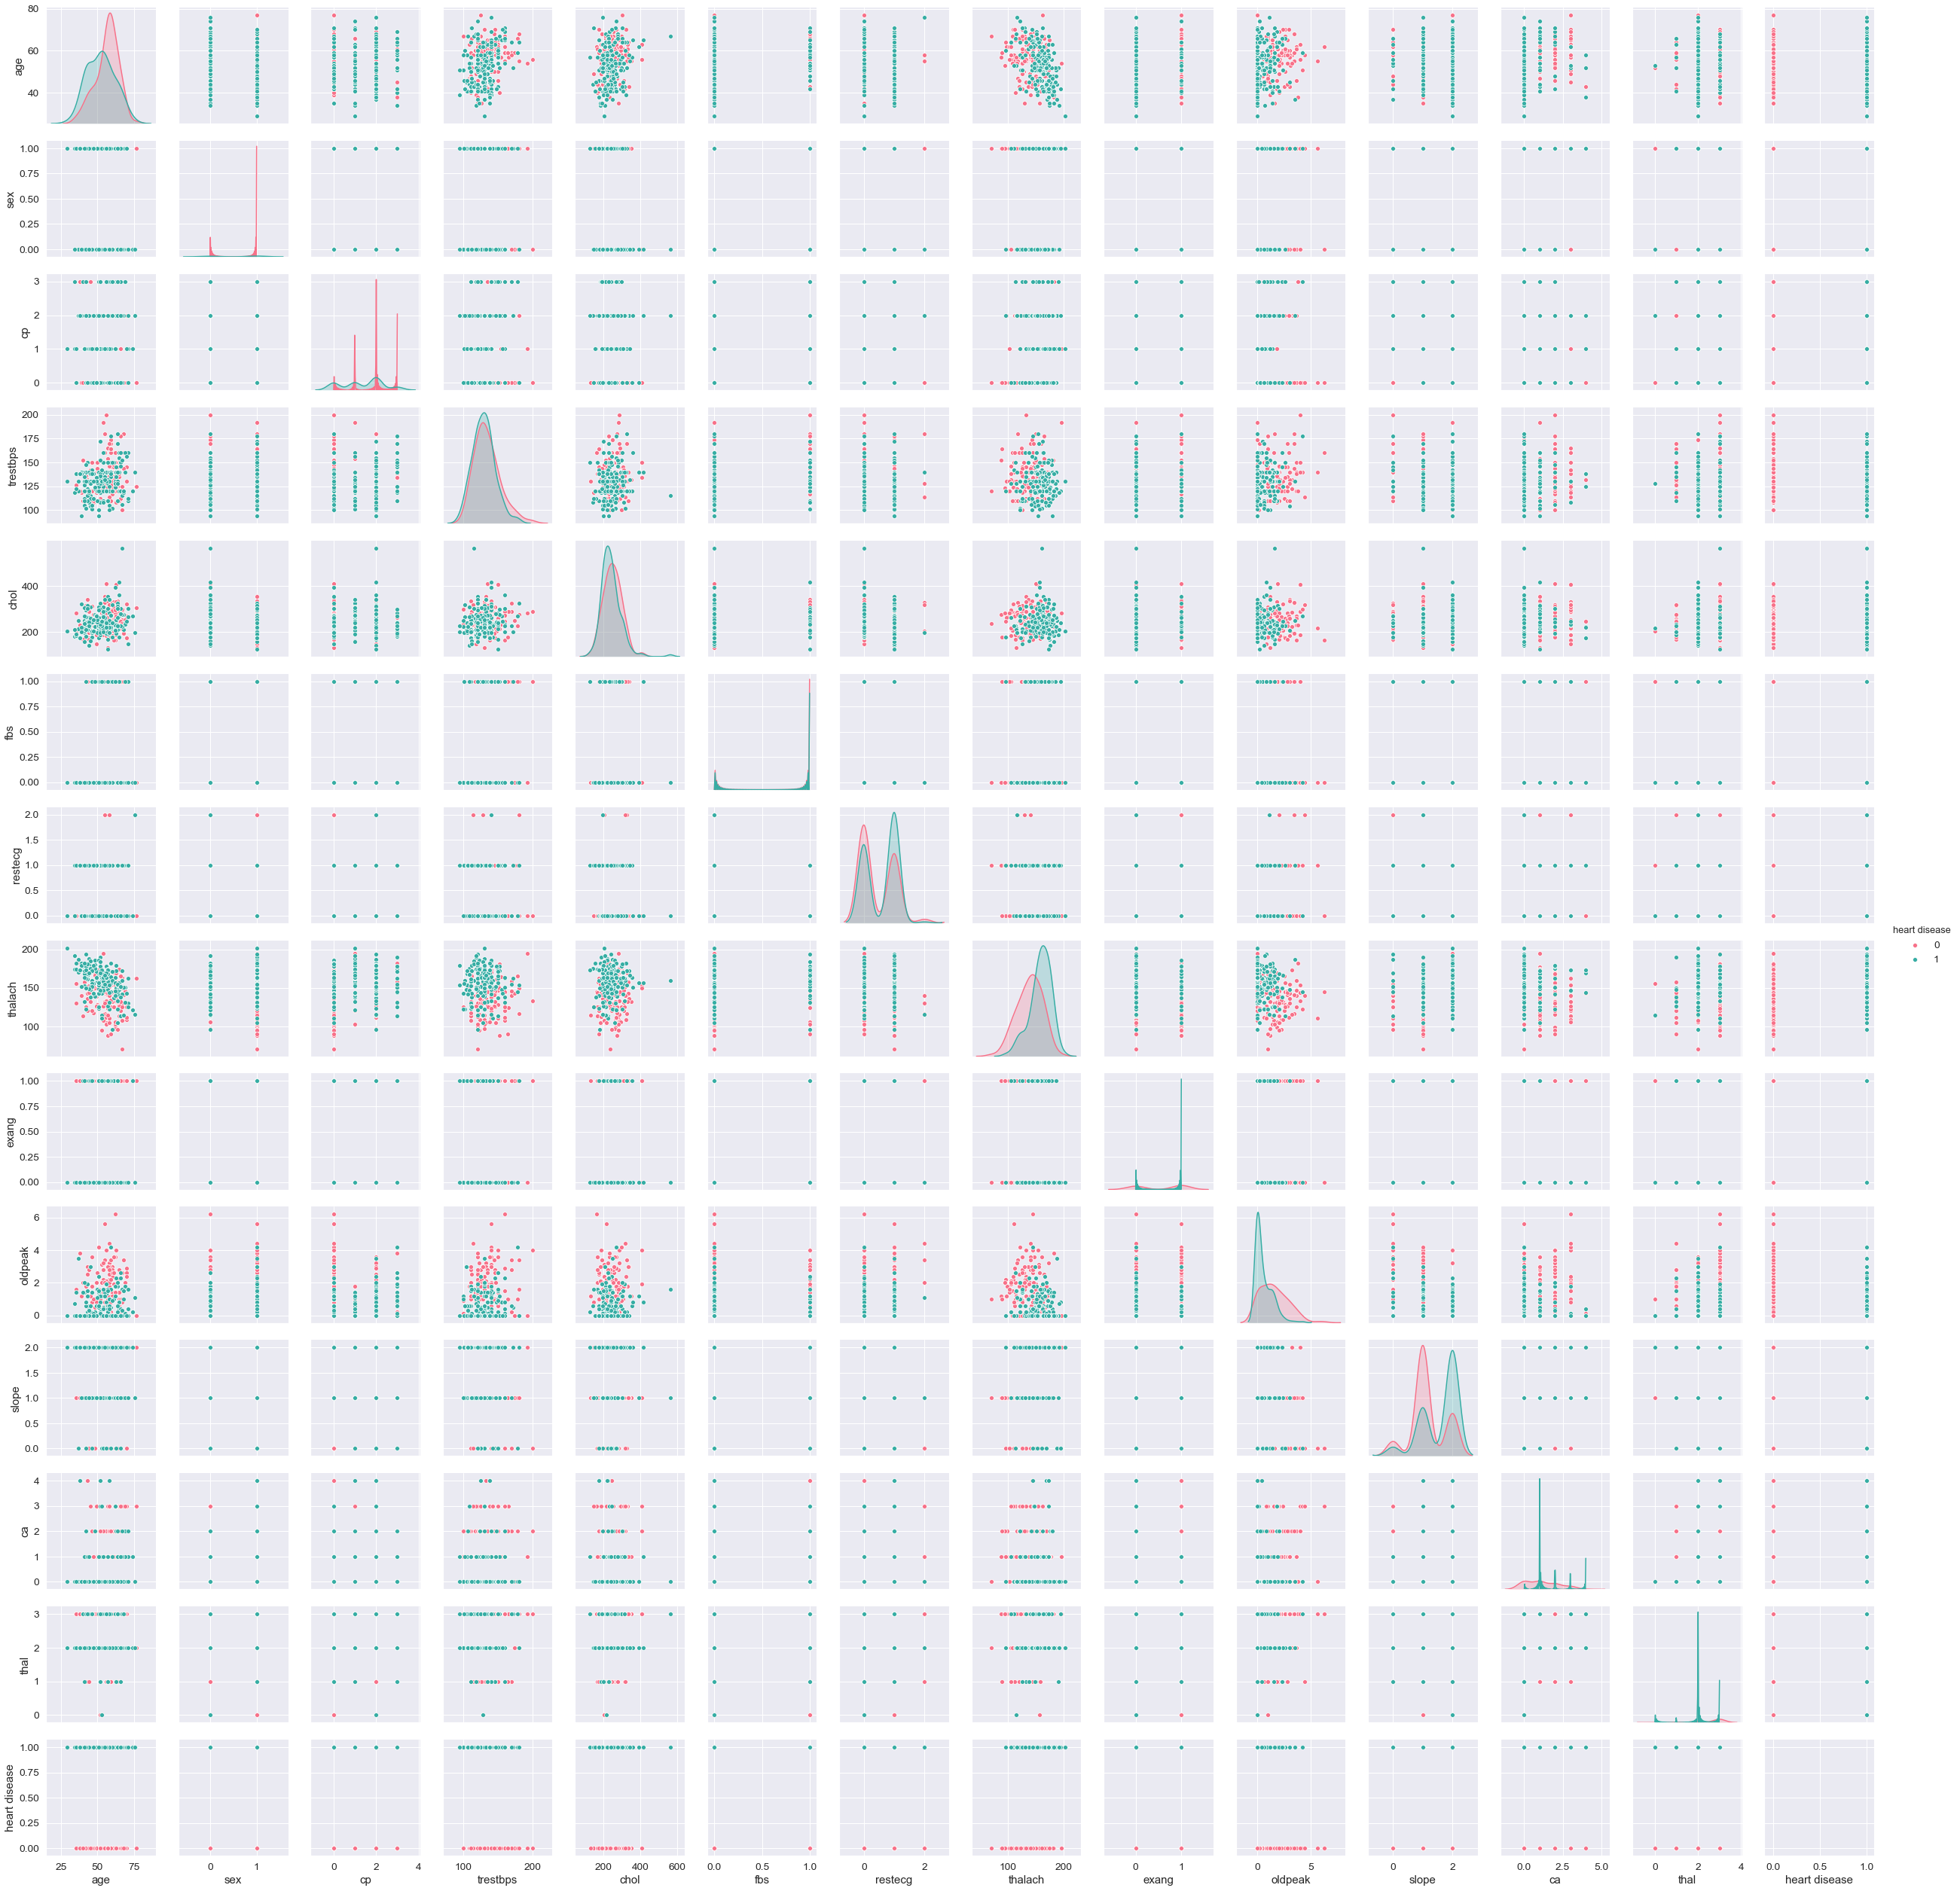

In [38]:
sns.pairplot(data, hue='heart disease', palette='husl')
plt.show()

We can easily see the two target classes from our pairplot above.

# Unsupervised Learning

## Creating the dataset

In [39]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:13]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Clustering

Now we are going to build our machine learning clustering models. 

We will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all we will find the best k value.
* Than we will use this k value to create a k-means model.
* And I\we will compare our original and k-means clustered datas.

For hierarchical clustering algorithm:

* First we will apply a dendrogram in order to find how many classes do we have in our data.
* Than we will use this class number to apply a hierarchical clustering algorithm.
* Lastly we will compare our original, k-means and hierarchical clustered datas.


### K-MEANS CLUSTERING ALGORITHM:

#### Finding the best K value:

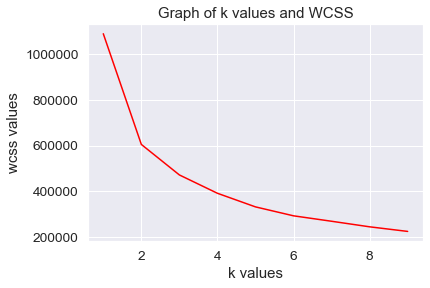

In [40]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We already know that our data set has two classes. 

Bu if we didn't know how many classes we have in our data set, we would use this method. 

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

#### K-Means Clustering Algorithm:

In [41]:
# Now we know our best k value is 2, we are creating a new k-means model:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

#### Comparing Original Classes and K-Means Algorithm Classes:

For visualization we will use only two features (trestbps and oldpeak) for the original and predicted datasets. Different classes will have seperate color and styles.

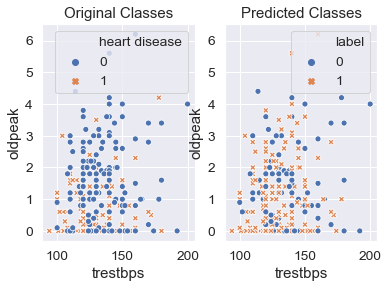

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='trestbps', y='oldpeak', hue='heart disease', style='heart disease', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='trestbps', y='oldpeak', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [43]:
print('Original Data Classes:')
print(data['heart disease'].value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k['label'].value_counts())

Original Data Classes:
1    165
0    138
Name: heart disease, dtype: int64
------------------------------
Predicted Data Classes:
1    193
0    110
Name: label, dtype: int64


### HIERARCHICAL CLUSTERING ALGORITHM:

#### Creating the Dendrogram:

We use dendrogram to find how many classes we have in our data set.

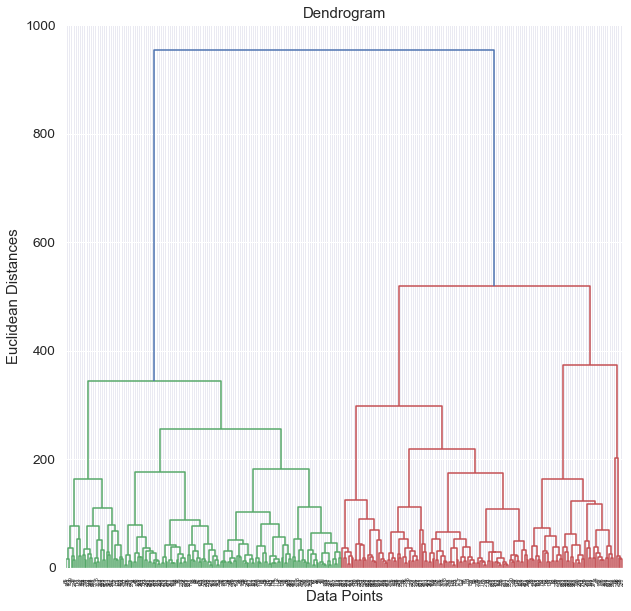

In [44]:
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

From the dendrogram we can read there are 2 classes in our data set.

#### Hierarchical Clustering Algorithm:

In [45]:
hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

#### Comparing Original, K-Means and Hierarchical Clustered Classes:

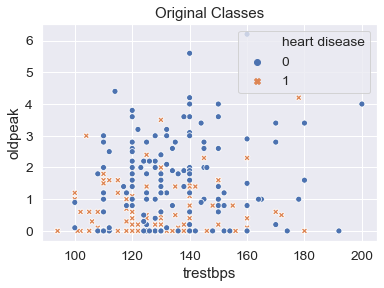

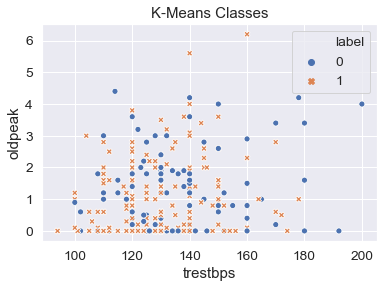

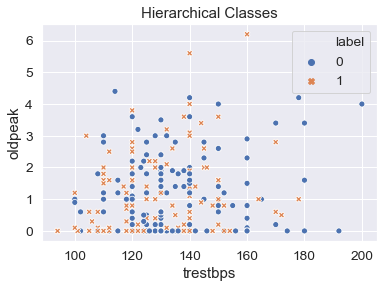

In [46]:
plt.title('Original Classes')
sns.scatterplot(x='trestbps', y='oldpeak', hue='heart disease', style='heart disease', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='trestbps', y='oldpeak', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='trestbps', y='oldpeak', hue='label', style='label', data=df_h)
plt.show()

In [47]:
print('Original Data Classes:')
print(data['heart disease'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k['label'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['label'].value_counts())

Original Data Classes:
1    165
0    138
Name: heart disease, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    193
0    110
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    153
1    150
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.

# Models to Evaluate

We will compare different machine learning models using the great Scikit-Learn library:

1. Logistic Regression
2. Naive-Bayes
3. Decision Tree Classifier
4. Random Forest Classifier
5. K-Nearest Neighbors

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning.

## Data labelled by K-Means

In [48]:
df_k.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,0
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [49]:
X = df_k.drop('label',axis=1)
y = df_k['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

* For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
* For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.     
     
When we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [50]:
scalar = StandardScaler()
X_train_sc = scalar.fit_transform (X_train) #fit and transform
X_test_sc = scalar.transform (X_test) # only transform

In [51]:
# Function to fit and evaluate a model

train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  
  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

#### Logistic Regression

auc score of train data 0.9996151996151996
auc score of test data 0.9947753396029257
confusion_matrix [[30  3]
 [ 0 58]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.95      1.00      0.97        58

    accuracy                           0.97        91
   macro avg       0.98      0.95      0.96        91
weighted avg       0.97      0.97      0.97        91

roc_auc 0.9947753396029257


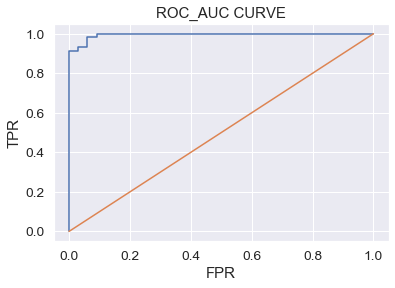

In [52]:
lr = LogisticRegression()
model_fit(lr,X_train_sc,y_train,X_test_sc,y_test)

#### Naive-Bayes

auc score of train data 0.9889369889369889
auc score of test data 0.9707419017763845
confusion_matrix [[29  4]
 [ 3 55]]
classification_report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.93      0.95      0.94        58

    accuracy                           0.92        91
   macro avg       0.92      0.91      0.92        91
weighted avg       0.92      0.92      0.92        91

roc_auc 0.9707419017763845


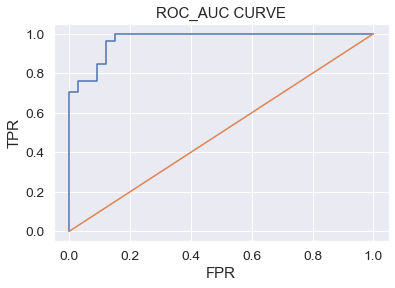

In [53]:
nb = GaussianNB()
model_fit(nb,X_train_sc,y_train,X_test_sc,y_test)

#### K-Neighbors Classifier

auc score of train data 0.9324675324675324
auc score of test data 0.8777429467084641
confusion_matrix [[22 11]
 [ 3 55]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.83      0.95      0.89        58

    accuracy                           0.85        91
   macro avg       0.86      0.81      0.82        91
weighted avg       0.85      0.85      0.84        91

roc_auc 0.8777429467084641


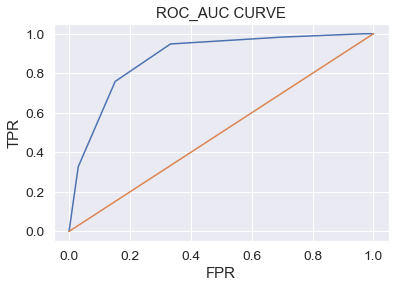

In [54]:
KNN = KNeighborsClassifier()
model_fit(KNN,X_train_sc,y_train,X_test_sc,y_test)

#### Decision Tree Classifier

auc score of train data 1.0
auc score of test data 0.9913793103448276
confusion_matrix [[33  0]
 [ 1 57]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        58

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

roc_auc 0.9913793103448276


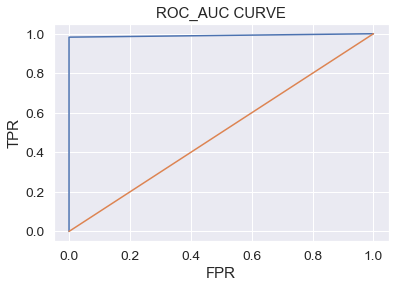

In [55]:
dt = DecisionTreeClassifier()
model_fit(dt,X_train_sc,y_train,X_test_sc,y_test)

#### Random Forest Classifier

auc score of train data 1.0
auc score of test data 0.9892894461859978
confusion_matrix [[33  0]
 [ 1 57]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        58

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

roc_auc 0.9892894461859978


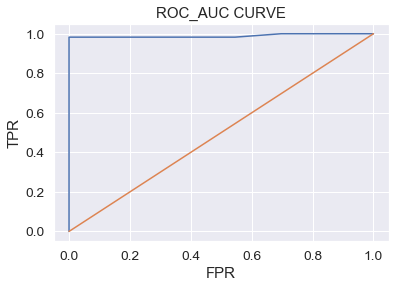

In [56]:
rf = RandomForestClassifier()
model_fit(rf,X_train_sc,y_train,X_test_sc,y_test)

In [57]:
score = pd.DataFrame({'model':['Logistic Regression (K-Means)', 'Naive-Bayes (K-Means)', 'K-Nearest Neighbors (K-Means)',
                               'Decision Tree Classifier (K-Means)', 'Random Forest Classifier (K-Means)'],
                     'train_accuracy':train,'test_accracy':test})
score

,model,train_accuracy,test_accracy
0,Logistic Regression (K-Means),0.999615,0.994775
1,Naive-Bayes (K-Means),0.988937,0.970742
2,K-Nearest Neighbors (K-Means),0.932468,0.877743
3,Decision Tree Classifier (K-Means),1.000000,0.991379
4,Random Forest Classifier (K-Means),1.000000,0.989289


## Data labelled by Agglomerative clustering

In [58]:
df_h.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [59]:
X = df_h.drop('label',axis=1)
y = df_h['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scaling Features

In [60]:
scalar = StandardScaler()
X_train_sc = scalar.fit_transform (X_train) #fit and transform
X_test_sc = scalar.transform (X_test) # only transform

#### Logistic Regression

auc score of train data 0.9983088562527815
auc score of test data 0.995169082125604
confusion_matrix [[45  1]
 [ 4 41]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.98      0.91      0.94        45

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91

roc_auc 0.995169082125604


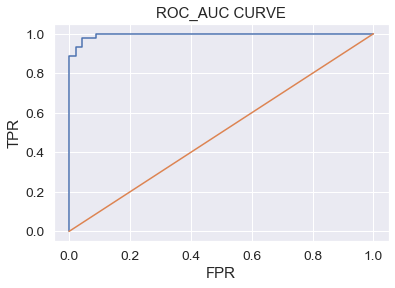

In [61]:
lr = LogisticRegression()
model_fit(lr,X_train_sc,y_train,X_test_sc,y_test)

#### Naive-Bayes

auc score of train data 0.9721406319537162
auc score of test data 0.9758454106280193
confusion_matrix [[45  1]
 [ 5 40]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.98      0.89      0.93        45

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91

roc_auc 0.9758454106280193


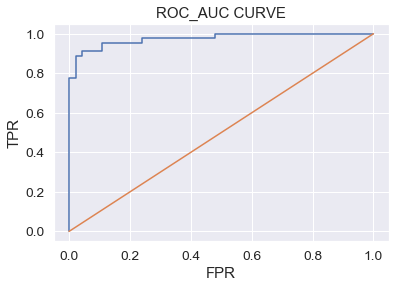

In [62]:
nb = GaussianNB()
model_fit(nb,X_train_sc,y_train,X_test_sc,y_test)

#### K-Neighbors Classifier

auc score of train data 0.9446817979528259
auc score of test data 0.8509661835748792
confusion_matrix [[36 10]
 [12 33]]
classification_report
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        46
           1       0.77      0.73      0.75        45

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

roc_auc 0.8509661835748792


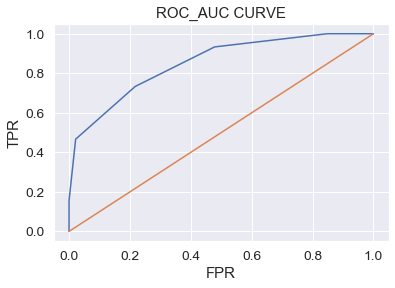

In [63]:
KNN = KNeighborsClassifier()
model_fit(KNN,X_train_sc,y_train,X_test_sc,y_test)

#### Decision Tree Classifier

auc score of train data 1.0
auc score of test data 0.9557971014492753
confusion_matrix [[45  1]
 [ 3 42]]
classification_report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.93      0.95        45

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91

roc_auc 0.9557971014492753


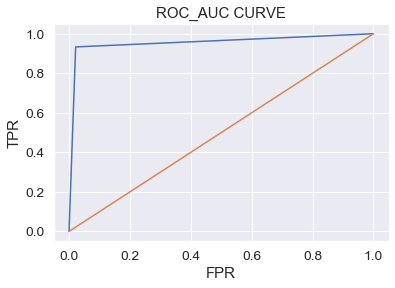

In [64]:
dt = DecisionTreeClassifier()
model_fit(dt,X_train_sc,y_train,X_test_sc,y_test)

#### Random Forest Classifier

auc score of train data 1.0
auc score of test data 0.9942028985507246
confusion_matrix [[45  1]
 [ 4 41]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.98      0.91      0.94        45

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91

roc_auc 0.9942028985507246


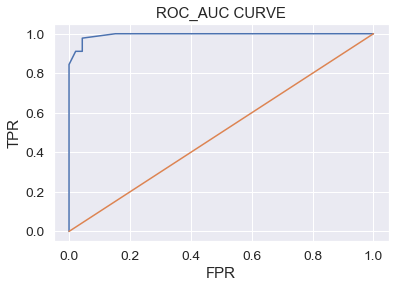

In [65]:
rf = RandomForestClassifier()
model_fit(rf,X_train_sc,y_train,X_test_sc,y_test)

In [66]:
score = pd.DataFrame({'model':['Logistic Regression (K-Means)', 'Naive-Bayes (K-Means)', 'K-Nearest Neighbors (K-Means)',
                               'Decision Tree Classifier (K-Means)', 'Random Forest Classifier (K-Means)',
                               'Logistic Regression (Agg)', 'Naive-Bayes (Agg)', 'K-Nearest Neighbors (Agg)',
                               'Decision Tree Classifier (Agg)', 'Random Forest Classifier (Agg)'],
                     'train_accuracy':train,'test_accracy':test})
score

,model,train_accuracy,test_accracy
0,Logistic Regression (K-Means),0.999615,0.994775
1,Naive-Bayes (K-Means),0.988937,0.970742
2,K-Nearest Neighbors (K-Means),0.932468,0.877743
3,Decision Tree Classifier (K-Means),1.000000,0.991379
4,Random Forest Classifier (K-Means),1.000000,0.989289
5,Logistic Regression (Agg),0.998309,0.995169
6,Naive-Bayes (Agg),0.972141,0.975845
7,K-Nearest Neighbors (Agg),0.944682,0.850966
8,Decision Tree Classifier (Agg),1.000000,0.955797
9,Random Forest Classifier (Agg),1.000000,0.994203


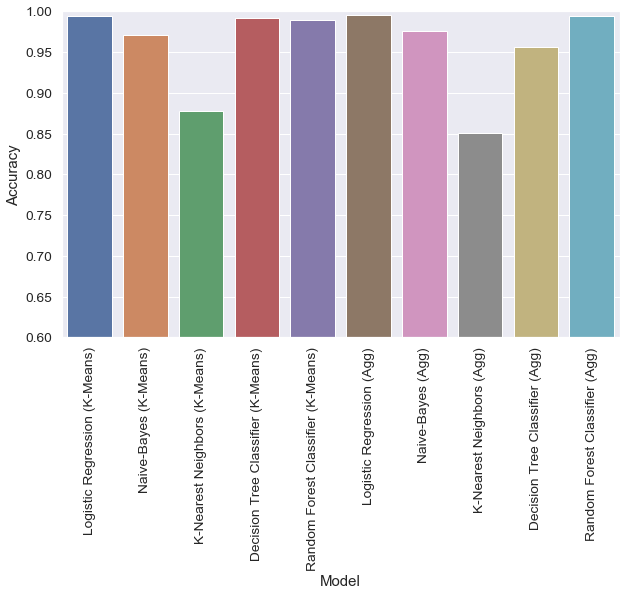

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x="model", y="test_accracy", data=score)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.6,1])
plt.xticks(rotation=90)
plt.show()